## Title: 


Contributors: Nicole Bills and Allison Lee

### Table of Contents
1. <a href ='#goal'>Problem Statement</a>
2. <a href='#datasources'>Data Sources</a>
3. <a href='#collection'>Data Collection</a>
4. <a href='#testing'>Hypothesis Test I</a>
5. <a href='#test2'>Hypothesis Test II</a>
5. <a href='#effect'>Effect Size</a>
6. <a href='#findings'>Findings and Analysis</a>
7. <a href='#rec'>Recommendations</a>

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

<a id='goal'></a>
### Problem Statement

The goal of this analysis is to gain a better understanding of eviction rates in Ward 8, Washington D.C. We aim to test two hypotheses: 
1. There is a significant difference between eviction rates in census tracts with Planned Unit Developments (PUDs) and those without. 
2. Census tracts where the poverty rate is above 40 percent have higher eviction rates than those where the poverty rate is below 40 percent. 

### Approach

<a id='datasources'></a>
### Data Sources

The Eviction Lab: https://evictionlab.org/

This research uses data from The Eviction Lab at Princeton University, a project directed by Matthew Desmond and designed by Ashley Gromis, Lavar Edmonds, James Hendrickson, Katie Krywokulski, Lillian Leung, and Adam Porton. The Eviction Lab is funded by the JPB, Gates, and Ford Foundations as well as the Chan Zuckerberg Initiative. More information is found at evictionlab.org.


Open Data DC: https://opendata.dc.gov/
 - Planned Unit Developments: https://opendata.dc.gov/datasets/1b3e77aaa6154d1285af639323b0504f_14/data

<a id='collection'></a>
### Data Cleaning

In [3]:
# Read in data on Ward8 
df = pd.read_csv('../data/cleaned_for_testing.csv')

<a id='testing'></a>
### Hypothesis Test I

We selected a significance level of alpha = 0.05. 

We set our null and alternative hypotheses as follows:

**H0:** There is no difference between eviction rates in census tracts with PUDs compared to tracts without PUDs. 

**Ha:** On average, there is a statistically significant difference between eviction rates.

To test these claims, we compared the means of two samples: one sample of tracts in DC with PUDs, and one sample of tracts without PUDs. We assume the samples are independent and from normally distributed populations, and we use a two-tailed t-test to test if the difference in the means can be attributed to random chance. We selected Welsch's t-test because our sample sizes are small (less than thirty), and we do not assume equal population variances. 

In [10]:
# TO DO ->  prove assumptions have been met
%run ../python_files/hypothesis_tests

In [11]:
# Create PUD variable and two samples
with_PUDS, no_PUDS = create_PUD_variable_and_samples(df)

<Figure size 720x432 with 0 Axes>

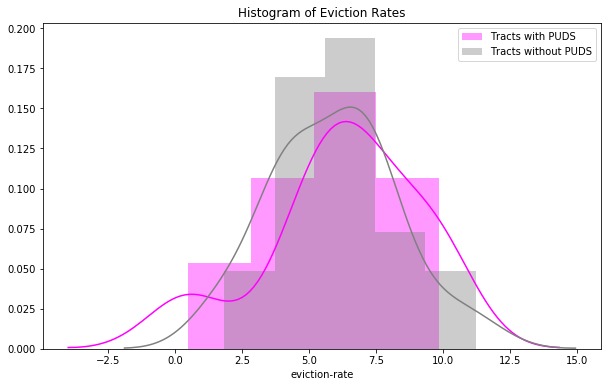

In [12]:
figure = plt.figure(figsize = (10, 6))
create_sample_dists(with_PUDS, no_PUDS, 'eviction-rate')
plt.legend(['Tracts with PUDS', 'Tracts without PUDS'])
plt.title('Histogram of Eviction Rates'); 

In [33]:
hypothesis_test(with_PUDS, no_PUDS, variable = 'eviction-rate', type = 'two-sided', alpha = 0.5)

(Ttest_indResult(statistic=0.31466609718334176, pvalue=0.7592466663700481),
 'The p-value is greater than alpha; therefore we fail to reject the null hypothesis.')

The p-value is 0.759, meaning there is a 76% chance of obtaining these results when the null hypothesis is true. The difference between the average eviction rates of the two samples is not statistically significant, and we fail to reject the null hypothesis. 

<a id='test2'></a>
### Hypothesis Test II

We selected a significance level of alpha = 0.05.

We set our null and alternative hypotheses as follows:

**H0:** Census tracts with poverty rates higher than 40 percent have the same or lower rates of eviction. 

**Ha:** Census tracts with poverty rates higher than 40 percent have higher rates of eviction. 

To test our alternative hypothesis, we decided to use a one-tailed t-test. This test was appropriate because we are dealing with small sample sizes, and unknown population variances (where we assume the variances are not equal). 

In [115]:
# TO DO - prove assumptions have been met

In [16]:
# Create two samples from datafrome of census tracts with high and lower poverty rates
high, lower = create_povsamples_from_dataframe(df, variable = 'poverty-rate')

<Figure size 720x432 with 0 Axes>

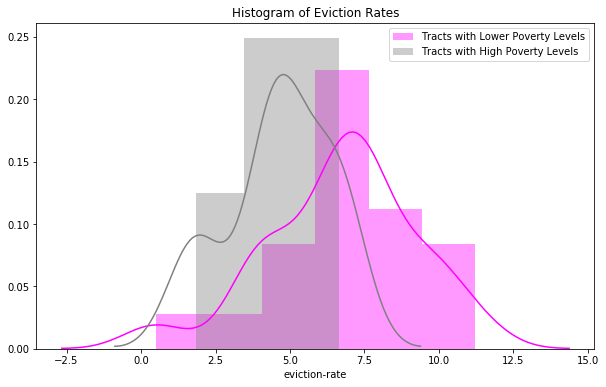

In [19]:
figure = plt.figure(figsize = (10, 6))
create_sample_dists(lower, high, 'eviction-rate')
plt.legend(['Tracts with Lower Poverty Levels', 'Tracts with High Poverty Levels'])
plt.title('Histogram of Eviction Rates'); 

In [34]:
hypothesis_test(high, lower, variable = 'eviction-rate', type = 'two-sided', alpha = 0.05)

(Ttest_indResult(statistic=-2.5966254090573613, pvalue=0.015633962244444684),
 'The p-value is less than alpha; therefore, we reject the null hypothesis.')

The scipy stats test returns a p-value for a two-sided ttest. To evaluate the one-tailed p-value against our alpha, we need to divide the output p-value by two. 

There is a 1.5% chance of obtaining these results when the null hypothesis is true. In other words, there is a statistically significant difference between average eviction rates of high poverty areas (poverty rate above 40%) and lower poverty areas ( below or equal to 40%). We therefore reject the null hypothesis. 

<a id='effect'></a>
### Effect Size

Effect size provides a measure to let us know whether it is important that we found a statistically significant difference between average eviction rates in high poverty and lower poverty areas. 

<a id='findings'></a>
### Findings and Analysis

<a id='rec'></a>
### Recommendations